In [ ]:
from octo.data.oxe import make_oxe_dataset_kwargs_and_weights
from octo.data.dataset import make_interleaved_dataset


def get_kwargs(name):
    dataset_kwargs_list, sample_weights = make_oxe_dataset_kwargs_and_weights(
        [(name, 1.0)],
        "gs://gnm_rlds_separate/",
        load_camera_views=("primary",),
    )
    return dataset_kwargs_list, sample_weights

def get_actions(dataset_kwargs_list, sample_weights):
    SHUFFLE_BUFFER_SIZE=1000
    BATCH_SIZE=8
    dataset = make_interleaved_dataset(
        dataset_kwargs_list,
        sample_weights,
        shuffle_buffer_size=SHUFFLE_BUFFER_SIZE,
        batch_size=BATCH_SIZE,
        train=True,
    )
    iterator = dataset.iterator(prefetch=1)

    dim0, dim1 = [], []

    for i in range(1000):
        batch = next(iterator)
        x = batch['action'][:, 0, 0, 0]
        y = batch['action'][:, 0, 0, 1]

        dim0.extend(x)
        dim1.extend(y)

    return dim0, dim1

def plot(name):
    import matplotlib.pyplot as plt
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4)) 
    dataset_kwargs_list, sample_weights = get_kwargs(name)
    dim0, dim1 = get_actions(dataset_kwargs_list, sample_weights)
    ax1.plot(dim0)
    ax1.set_title("dim0")
    ax2.plot(dim1)
    ax2.set_title("dim1")

    ax1.set_xticks([])
    ax2.set_xticks([])



    plt.show()


2024-04-13 03:39:01.441284: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-13 03:39:01.488242: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-13 03:39:01.488285: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-13 03:39:01.489771: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-13 03:39:01.497802: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-13 03:39:01.498638: I tensorflow/core/platform/cpu_feature_guard.cc:1

2024-04-13 03:39:16.701005: I tensorflow/core/grappler/optimizers/data/replicate_on_split.cc:32] Running replicate on split optimization


Cause: Unable to locate the source code of <function _gcd_import at 0x7f1fab5d3400>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function _gcd_import at 0x7f1fab5d3400>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function _gcd_import at 0x7f1fab5d3400>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
(None, 2)


2024-04-13 03:39:17.996954: I tensorflow/core/grappler/optimizers/data/replicate_on_split.cc:32] Running replicate on split optimization


(None, 2)

######################################################################################
# Loading the following 1 datasets (incl. sampling weight):                         #
# sacson_dataset: ==========================================================1.000000 #
######################################################################################



2024-04-13 03:39:20.496482: I tensorflow/core/grappler/optimizers/data/replicate_on_split.cc:32] Running replicate on split optimization


(None, 2)


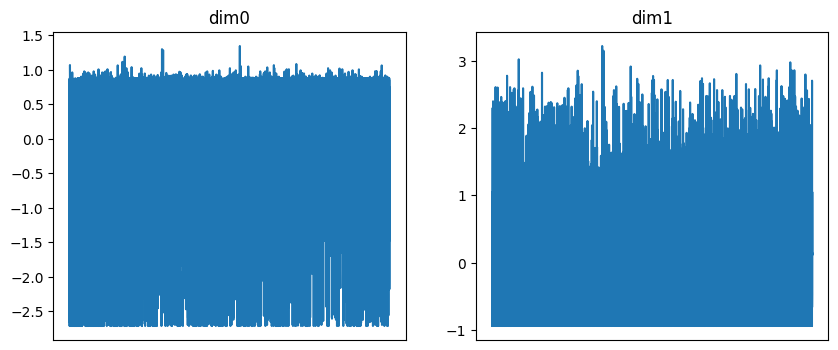

In [ ]:
plot("sacson_dataset")

2024-04-13 03:11:46.322450: I tensorflow/core/grappler/optimizers/data/replicate_on_split.cc:32] Running replicate on split optimization
2024-04-13 03:11:46.746550: I tensorflow/core/grappler/optimizers/data/replicate_on_split.cc:32] Running replicate on split optimization



######################################################################################
# Loading the following 1 datasets (incl. sampling weight):                         #
# cory_hall_dataset: =======================================================1.000000 #
######################################################################################



2024-04-13 03:11:48.625907: I tensorflow/core/grappler/optimizers/data/replicate_on_split.cc:32] Running replicate on split optimization


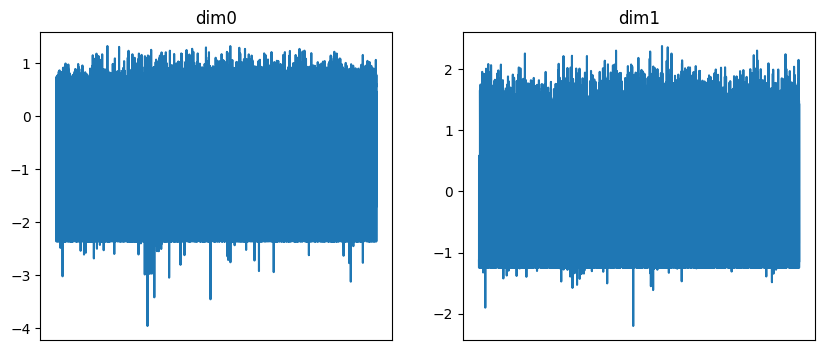

In [ ]:
plot("cory_hall_dataset")

2024-04-13 03:11:53.618771: I tensorflow/core/grappler/optimizers/data/replicate_on_split.cc:32] Running replicate on split optimization
2024-04-13 03:11:54.036776: I tensorflow/core/grappler/optimizers/data/replicate_on_split.cc:32] Running replicate on split optimization



######################################################################################
# Loading the following 1 datasets (incl. sampling weight):                         #
# recon_dataset: ===========================================================1.000000 #
######################################################################################



2024-04-13 03:11:55.959176: I tensorflow/core/grappler/optimizers/data/replicate_on_split.cc:32] Running replicate on split optimization


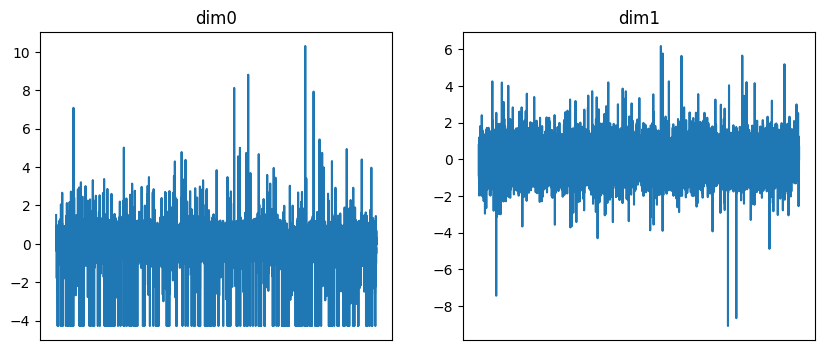

In [ ]:
plot("recon_dataset")

2024-04-13 03:12:02.240454: I tensorflow/core/grappler/optimizers/data/replicate_on_split.cc:32] Running replicate on split optimization
2024-04-13 03:12:02.705141: I tensorflow/core/grappler/optimizers/data/replicate_on_split.cc:32] Running replicate on split optimization



######################################################################################
# Loading the following 1 datasets (incl. sampling weight):                         #
# seattle_dataset: =========================================================1.000000 #
######################################################################################



2024-04-13 03:12:03.861676: I tensorflow/core/grappler/optimizers/data/replicate_on_split.cc:32] Running replicate on split optimization


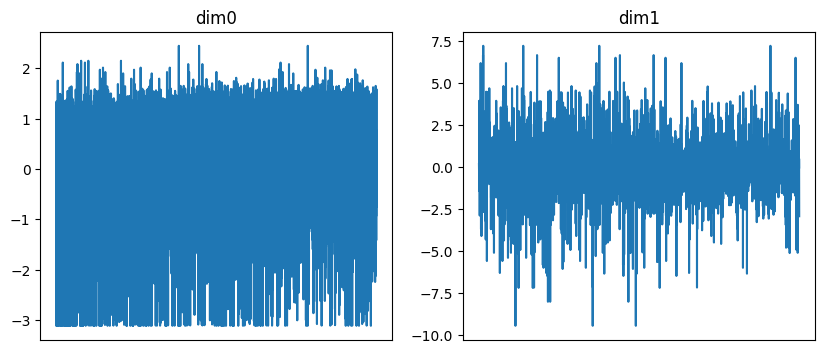

In [ ]:
plot("seattle_dataset")

In [ ]:
# make_single_dataset yields entire trajectories
traj = next(iterator)
print("Top-level keys: ", traj.keys())
print("Observation keys: ", traj["observation"].keys())
print("Task keys: ", traj["task"].keys())

Top-level keys:  dict_keys(['observation', 'task', 'action', 'dataset_name', 'action_pad_mask'])
Observation keys:  dict_keys(['image_primary', 'timestep', 'pad_mask_dict', 'timestep_pad_mask', 'task_completed'])
Task keys:  dict_keys(['language_instruction', 'pad_mask_dict'])
